**Problem Statement**: Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality 

In [3]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [7]:
dim = 3
n = 500
input = torch.rand(n, dim).float()
print('Input tensor shape =', input.shape)

Input tensor shape = torch.Size([500, 3])


In [8]:
weights_true = torch.tensor([[2.0, -3.0, 6.0]]).T
bias_true = torch.tensor([[8]])
print('Weights shape =', weights_true.shape)
print('Bias shape =', bias_true.shape)

y_true = (torch.einsum('ij, jk -> ik', (input**3),  weights_true) + torch.einsum('ij, jk -> ik', (input**2),  weights_true) + torch.einsum('ij, jk -> ik', input, weights_true) + bias_true).float()
print('Function output shape =', y_true.shape)

Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([500, 1])


In [9]:
input_dim = dim
output_dim = 1
num_hidden = 32

alpha = 0.01
epochs = 100



In [4]:
class TorchModel(nn.Module):
  def __init__(self, input_dim,output_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, num_hidden)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hidden, output_dim)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3


In [17]:
def torch_fit(input, y_true, model, loss, optimizer, alpha, epochs):
  for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(input)
    loss_value = loss(y_pred_tensor, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

In [10]:
loss = nn.MSELoss()
model = TorchModel(input_dim, output_dim, num_hidden)
optimizer = torch.optim.SGD(model.parameters(), alpha)

In [18]:
torch_fit(input, y_true, model, loss, optimizer, alpha, epochs)

Epoch 0, loss 204.46202087402344
Epoch 1, loss 187.39663696289062
Epoch 2, loss 158.08082580566406
Epoch 3, loss 103.06035614013672
Epoch 4, loss 36.36542510986328
Epoch 5, loss 32.50787353515625
Epoch 6, loss 32.849220275878906
Epoch 7, loss 29.314844131469727
Epoch 8, loss 30.391855239868164
Epoch 9, loss 26.693510055541992
Epoch 10, loss 28.943952560424805
Epoch 11, loss 24.637109756469727
Epoch 12, loss 28.725440979003906
Epoch 13, loss 23.178977966308594
Epoch 14, loss 29.92000389099121
Epoch 15, loss 22.096790313720703
Epoch 16, loss 31.91534996032715
Epoch 17, loss 21.04957389831543
Epoch 18, loss 33.59336853027344
Epoch 19, loss 19.862581253051758
Epoch 20, loss 34.20796203613281
Epoch 21, loss 18.742956161499023
Epoch 22, loss 34.15898513793945
Epoch 23, loss 17.673538208007812
Epoch 24, loss 33.46945571899414
Epoch 25, loss 16.729650497436523
Epoch 26, loss 32.48615646362305
Epoch 27, loss 15.848255157470703
Epoch 28, loss 31.26565933227539
Epoch 29, loss 15.080764770507812
E

In [15]:
loss = nn.MSELoss()
model = TorchModel(input_dim, output_dim, num_hidden)
optimizer = torch.optim.SGD(model.parameters(), alpha)

# One forward and backward pass for visualization
optimizer.zero_grad()
y_pred_tensor = model(input)
loss_value = loss(y_pred_tensor, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()

y_pred = model(input)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(220.4899, grad_fn=<MseLossBackward0>)
tensor(204.4620, grad_fn=<MseLossBackward0>)


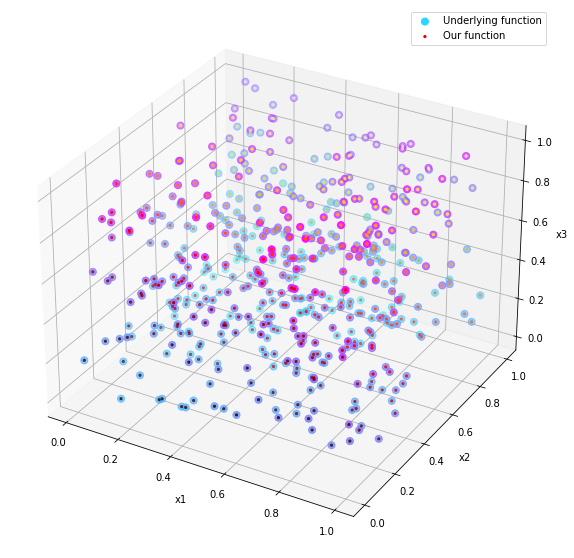

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.legend()
plt.show()